<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/Statistics/statistics_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.준비하기

## 1) 한글 폰트 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [22]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()
mpl.rcParams['axes.unicode_minus']=False

## 2) Google Drive와 연동하기

In [4]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

MY_GOOGLE_DRIVE_PATH = 'My Drive/파비통 데이터' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/파비통 데이터


In [5]:
%cd /content/drive/My Drive/파비통 데이터

/content/drive/My Drive/파비통 데이터


In [6]:
%ls

'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


#2.데이터 불러오기

In [7]:
df = pd.read_csv('Ashopping.csv',sep=',',encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


#3.데이터 전처리 실습

## 1) 표본 추출 실습

In [8]:
#무작위 표본 추출하기
data_temp = df.sample(n=10, replace=False, random_state=123) 
#n: 추출할 데이터의 크기 / replace: 복원추출(True), 비복원추출(False) 
#복원추출: 크기가 n인 표본을 뽑기 위해, n개의 원소를 하나씩 뽑는다. 원소를 하나 뽑을 때마다 복원하고 다음 원소를 뽑는다. n개의 원소를 다 뽑으면 모집단에 돌려놓는다. 
#비복원추출: 크기가 n인 표본을 뽑기 위해, n개의 원소를 하나씩 뽑는다. 원소를 하나 뽑을 때마다 복원하지 않고 다음 원소를 뽑는다. n개의 원소를 다 뽑으면 모집단에 돌려놓는다.
 
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,5,5,1,3,1052,0,3,6,7,4,5,5,3,4,6,7,6,6.0,6.0,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,7,7,1,4,1085,0,7,7,7,6,7,7,6,7,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,5,5,0,3,946,1,6,6,6,2,3,4,6,3,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,7,7,1,7,1083,0,3,7,7,5,7,7,6,7,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,5,5,1,5,1090,0,6,6,7,5,6,7,6,6,7,6,5,6.0,6.0,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,7,7,1,9,1089,0,5,5,7,3,7,6,5,6,6,5,6,6.0,6.0,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,5,5,1,9,938,0,7,7,6,3,4,5,7,7,5,5,6,7.0,6.0,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,5,5,1,1,1051,0,4,5,7,5,5,6,6,5,5,6,6,5.0,5.0,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,2,2,1,3,679,0,5,5,6,3,4,5,5,6,7,5,6,7.0,6.0,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,5,5,1,5,927,0,3,4,5,3,2,5,4,5,5,4,5,4.0,5.0,7,7,6,7,6,5,4,5,5,5


## 2) 레코드 추출 실습

In [9]:
churn_customer = df[df.이탈여부 == 1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,6,6,1,5,615,0,2,6,2,2,6,4,4,4,5,6,6,6.0,NaN,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,6,6,1,8,693,0,5,6,2,3,1,4,5,6,6,5,7,NaN,NaN,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,4,4,1,3,528,0,5,6,1,2,5,4,5,6,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,3,3,1,3,549,0,4,7,2,2,6,3,4,6,5,7,6,6.0,7.0,6,7,6,6,7,5,7,6,6,6


## 3) 특정 필드 추출 실습

In [10]:
df_1 = df[['고객ID','방문빈도']] # 한번에 여러 column을 추출할 땐 [[]]!
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


## 4) 데이터 분할하기 실습
- 고객ID를 기준으로 500번 이상/이하를 나누기

In [11]:
under_500 = df[df.고객ID <= 500]
upper_500 = df[df.고객ID >= 500]

In [12]:
under_500.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [13]:
upper_500.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
499,500,0,10916910,29,376445,8,260450,2,2,0,4,4,1,3,1065,1,3,6,7,4,6,5,4,5,6,4,4,6.0,6.0,4,6,4,7,7,5,6,7,5,6
500,501,0,5139500,15,342633,20,368100,2,4,1,4,4,1,5,953,0,5,7,7,3,4,3,5,5,5,4,5,4.0,5.0,5,6,5,6,5,4,4,5,4,4
501,502,0,3171450,10,317145,26,365150,2,1,1,4,4,1,3,1035,0,6,6,7,3,3,4,6,6,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
502,503,0,2383900,8,297988,20,347600,2,4,0,4,4,1,6,1030,0,2,5,7,2,1,2,4,2,6,7,6,6.0,6.0,6,6,7,6,6,6,6,6,6,6
503,504,0,4516170,10,451617,9,246795,1,4,1,5,5,1,3,810,0,5,5,4,3,4,4,5,6,6,7,6,6.0,5.0,6,6,7,5,6,5,6,6,6,6


## 5) 데이터 추가 실습
- under_500에 upper_500 데이터 셋을 추가

In [14]:
df_join = under_500.append(upper_500, ignore_index=True)
#ignore_index: 합쳐지는 데이터에 새로운 index를 부여할지(True), 합쳐지는 데이터가 가지고 있는 index를 유지할지(False) 정하는 인자
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
997,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
998,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
999,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


## 6) 데이터 병합 실습
- 서로 다른 필드를 병합해보는 작업
- **how (inner, outer, left, right)**: join하는 방식 선택하는 인자/ default=inner join
- **on**: 병합할 기준의 컬럼을 지정해주는 인자/ default = 두 데이터 세트의 공통된 열을 찾아 병합

In [15]:
df_1 = df[['고객ID','방문빈도']]
df_2 = df[['고객ID','총_매출액']]

df_merge = df_1.merge(df_2)
df_merge

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950
...,...,...,...
995,996,8,5135090
996,997,49,10315690
997,998,10,2741290
998,999,15,11268990


#4.파생변수 생성
- 기존 변수에 특정 조건/함수를 사용하여 새롭게 파생시킨 필드

##1) 표현형태 변환 실습

In [16]:
df['남녀'] = np.where(df.성별 == 0, '남자','여자')
#np.where : 조건에 따라 값을 변환하거나 추출해주는 함수
#np.where(추출조건, x, y) 
#x: 조건을 만족했을 때, y: 조건을 만족하지 않았을 때
df[['고객ID','성별','남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


## 2) 척도 변환 실습
- 특정 변수의 척도를 변환하여 새로운 척도로 나타내는 방식
- 원칙적으로 정보의 양이 많은 척도에서 정보의 양이 적은 척도로의 변환만이 가능

In [17]:
df['New고객등급'] = np.where(df.총_매출액 >=5000000,'상',np.where(df.총_매출액 >=3000000, '중','하'))
df[['고객ID','총_매출액','New고객등급']]

,고객ID,총_매출액,New고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


## 3) 모델링을 활용하여 파생변수 생성 실습
- 각종 함수나 기존 변수들의 수학적 결합을 통해 새로운 변수를 모델링하여 파생변수를 만드는 방법

In [18]:
df['New_1회_평균매출액'] = df['총_매출액']/df['방문빈도']
df[['고객ID','총_매출액','방문빈도','New_1회_평균매출액']]
#Python에서는 변수간 사칙연산이 가능함!

,고객ID,총_매출액,방문빈도,New_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


## 4) 거래이력 요약을 통한 파생변수 실습
- 특정 레코드 혹은 사례의 누적 거래이력을 요약하여 요약통계량과 같이 특정 레코드의 특성을 나타내는 새로운 변수를 생성하는 것

In [19]:
#비이탈고객 레코드 추출
chrun_customer = df[df.이탈여부==1]
non_chrun_customer = df[df.이탈여부==0]

In [20]:
print(sum(chrun_customer.총_매출액))      #이탈고객에 대한 총 매출액 합계
print(sum(non_chrun_customer.총_매출액))  #비이탈고객에 대한 총 매출액 합계

373918850
6694770910


#5.통계 그래프
- 히스토그램, 산점도, 파이차트, 상자그림

## 1) 히스토그램
- 원하는 범주에 따라 해당 범주의 빈도를 막대로 표현함으로써, 빈도의 수준과 상대적 크기의 차이를 시각적으로 판단하기에 용이

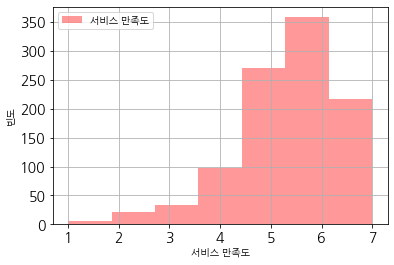

In [23]:
#고객 서비스 만족도 현황 파악하기
%matplotlib inline
plt.hist(df['서비스_만족도'], alpha=0.4, bins=7, rwidth=1, color ='r',label='서비스 만족도')
#rwidth: bar 사이의 간격 설정, label: legend에 나타날 텍스트
plt.legend()
plt.grid()
plt.xlabel('서비스 만족도')
plt.ylabel('빈도')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 2) 산점도
- 두 변수들 간의 관계를 좌표평면 상의 점으로 나타내는 방법

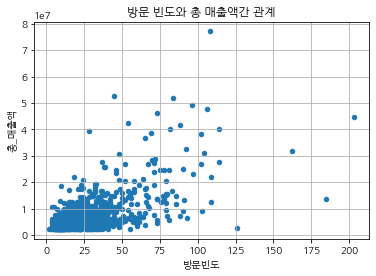

In [24]:
%matplotlib inline
df.plot.scatter(x='방문빈도',y='총_매출액', grid=True, title='방문 빈도와 총 매출액간 관계')

- 방문빈도가 50회 이전으로는 총 매출액과 방문빈도간의 상관관계가 큰 것을 볼 수 있다.
- 50회 이후로는 편차가 커짐을 볼 수 있다. (방문빈도가 많다고 해도 총 매출액이 크지 않고, 방문빈도가 상대적으로 적어도 총 매출액이 큰 경우도 있다.)
- 이 산점도를 통해 그룹별로 마케팅 전략을 다르게 짜볼 수 있다.


## 3) 파이차트
- 명목형 척도로 측정된 변수의 각 항목에 대한 비율을 하나의 원내에서 조각을 내서 표현한 그래프
- 구성요소 비율의 합은 100%이며, 명목형 데이터를 사용하는 것이 바람직하다.

In [28]:
#구매유형별 고객 그룹화하기
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

고객ID                          ...   New_1회_평균매출액                             
      count        mean         std  ...            50%            75%           max
구매유형                                 ...                                            
1      43.0  523.186047  286.875886  ...  364625.000000  414084.375000  4.897520e+05
2     317.0  476.406940  282.585411  ...  193453.666667  268758.923077  4.966717e+05
3     144.0  514.868056  287.815069  ...  630736.878669  786918.432540  2.680100e+06
4     496.0  509.760081  293.080306  ...  248438.571429  344615.297203  4.994987e+05

[4 rows x 312 columns]

In [29]:
df['구매유형']

0      4
1      4
2      4
3      4
4      2
      ..
995    3
996    2
997    4
998    3
999    4
Name: 구매유형, Length: 1000, dtype: int64

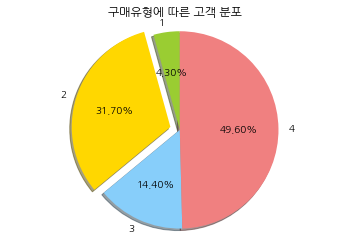

In [38]:
labels = ['1','2','3','4']
sizes = [43, 317,144,496] #고객 수
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = (0,0.1,0,0) #특정 그룹에 대해 시각적인 분리 수준을 결정하는 값을 기재, 0: 각 그룹이 붙어서 표현 / 값이 커질수록 그만큼 떨어져서 표현된다.

%matplotlib inline
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow = True, startangle=90)
#autopct: 각 범주가 데이터에서 차지하는 비율을 파이차트에 표현
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show()

## 4) 상자그림
- 수치형 변수의 분포적 특성을 자세히 나타내는 시각적 분석도구
  - (Q1-최소값)=(최대값-Q3) 은 좌우가 대칭인 분포
  - (최대값-Q3)<(Q1-최소값)은 왼쪽에 꼬리를 가진 분포
  - (최대값-Q3)>(Q1-최소값)은 오른쪽에 꼬리를 가진 분포

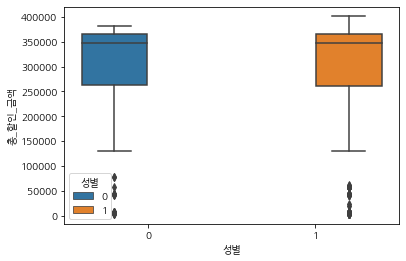

In [39]:
#상자그림 작성하기
%matplotlib inline
sns.boxplot(x='성별',y='총_할인_금액',hue='성별',data = df)

- 여자의 최대 할인금액이 높지만, 최소값, 평균, 제1사분위, 2사분위, 3사분위의 차이가 크지 않다. 
- 성별에 따른 할인쿠폰 제도는 불필요하다고 생각할 수 있다.